In [ ]:
### Assignment 22nd Feb web scrapping

In [ ]:
## Code for scrapping youtube videos for from PW Channel and getting the output
import scrapetube
import json
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS,cross_origin
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq
import logging
import pymongo
import csv
from csv import DictWriter
##Fetching Youtube Channel ID

app = Flask(__name__)
@app.route('/',methods=['GET'])  # route to display the home page
@cross_origin()
def homePage():
    return render_template("index.html")
@app.route("/review" , methods = ['POST','GET'])
def scrapyoutube():
    review=[]
    mydict={}
    if request.method == 'GET':
      videos = list(scrapetube.get_channel("UCphU2bAGmw304CFAzy0Enuw"))
      headers = ["videotitlefinal", "videourl", "videotimefinal", "viewcountfinal", "videothumbnail"]
      with open("data.csv", "w") as file:
        writer = csv.writer(file)
        writer.writerow(headers)
      for i, video in enumerate(videos):
            ##Scrapping for first 5 videos
            if i < 5:
                ##Scrapping for first 5 videos Title
                videotitle=(video['title'])
                videotitlefinal=str(videotitle['runs'][0]['text'])
                ##Scrapping for first 5 videos URL
                videourl=str("https://www.youtube.com/watch?v=" + video['videoId'])
                ##Scrapping for views count
                viewcount=  str((videotitle['accessibility']['accessibilityData']['label']))
                viewcountlist=list(viewcount.split(" "))
                viewcountfinal=str(viewcountlist[-2])
                ###scrapping time stamp of a video
                videotime=(video['publishedTimeText']['simpleText'])
                videotimefinal=str(videotime)
                ### scrapping for thumbnail url
                videothumbnail=str("https://img.youtube.com/vi/"+video['videoId']+"/maxresdefault.jpg")
                mydict={"videotitlefinal": videotitlefinal, "videourl": videourl, "videotimefinal": videotimefinal, "viewcountfinal": viewcountfinal,
                                    "videothumbnail": videothumbnail}
                review.append(mydict)
                ###Writing into a CSV File
                with open("data.csv", "a") as f_object:
                  dictwriter_object = DictWriter(f_object, fieldnames=headers)
                  dictwriter_object.writerow(mydict)
      
            else:
              break
      return render_template("result.html", review=review[0:(len(review)-1)])
    else:
      return render_template("result.html")
if __name__=="__main__":
      app.run(host="0.0.0.0")


### The HTML Output of code above:
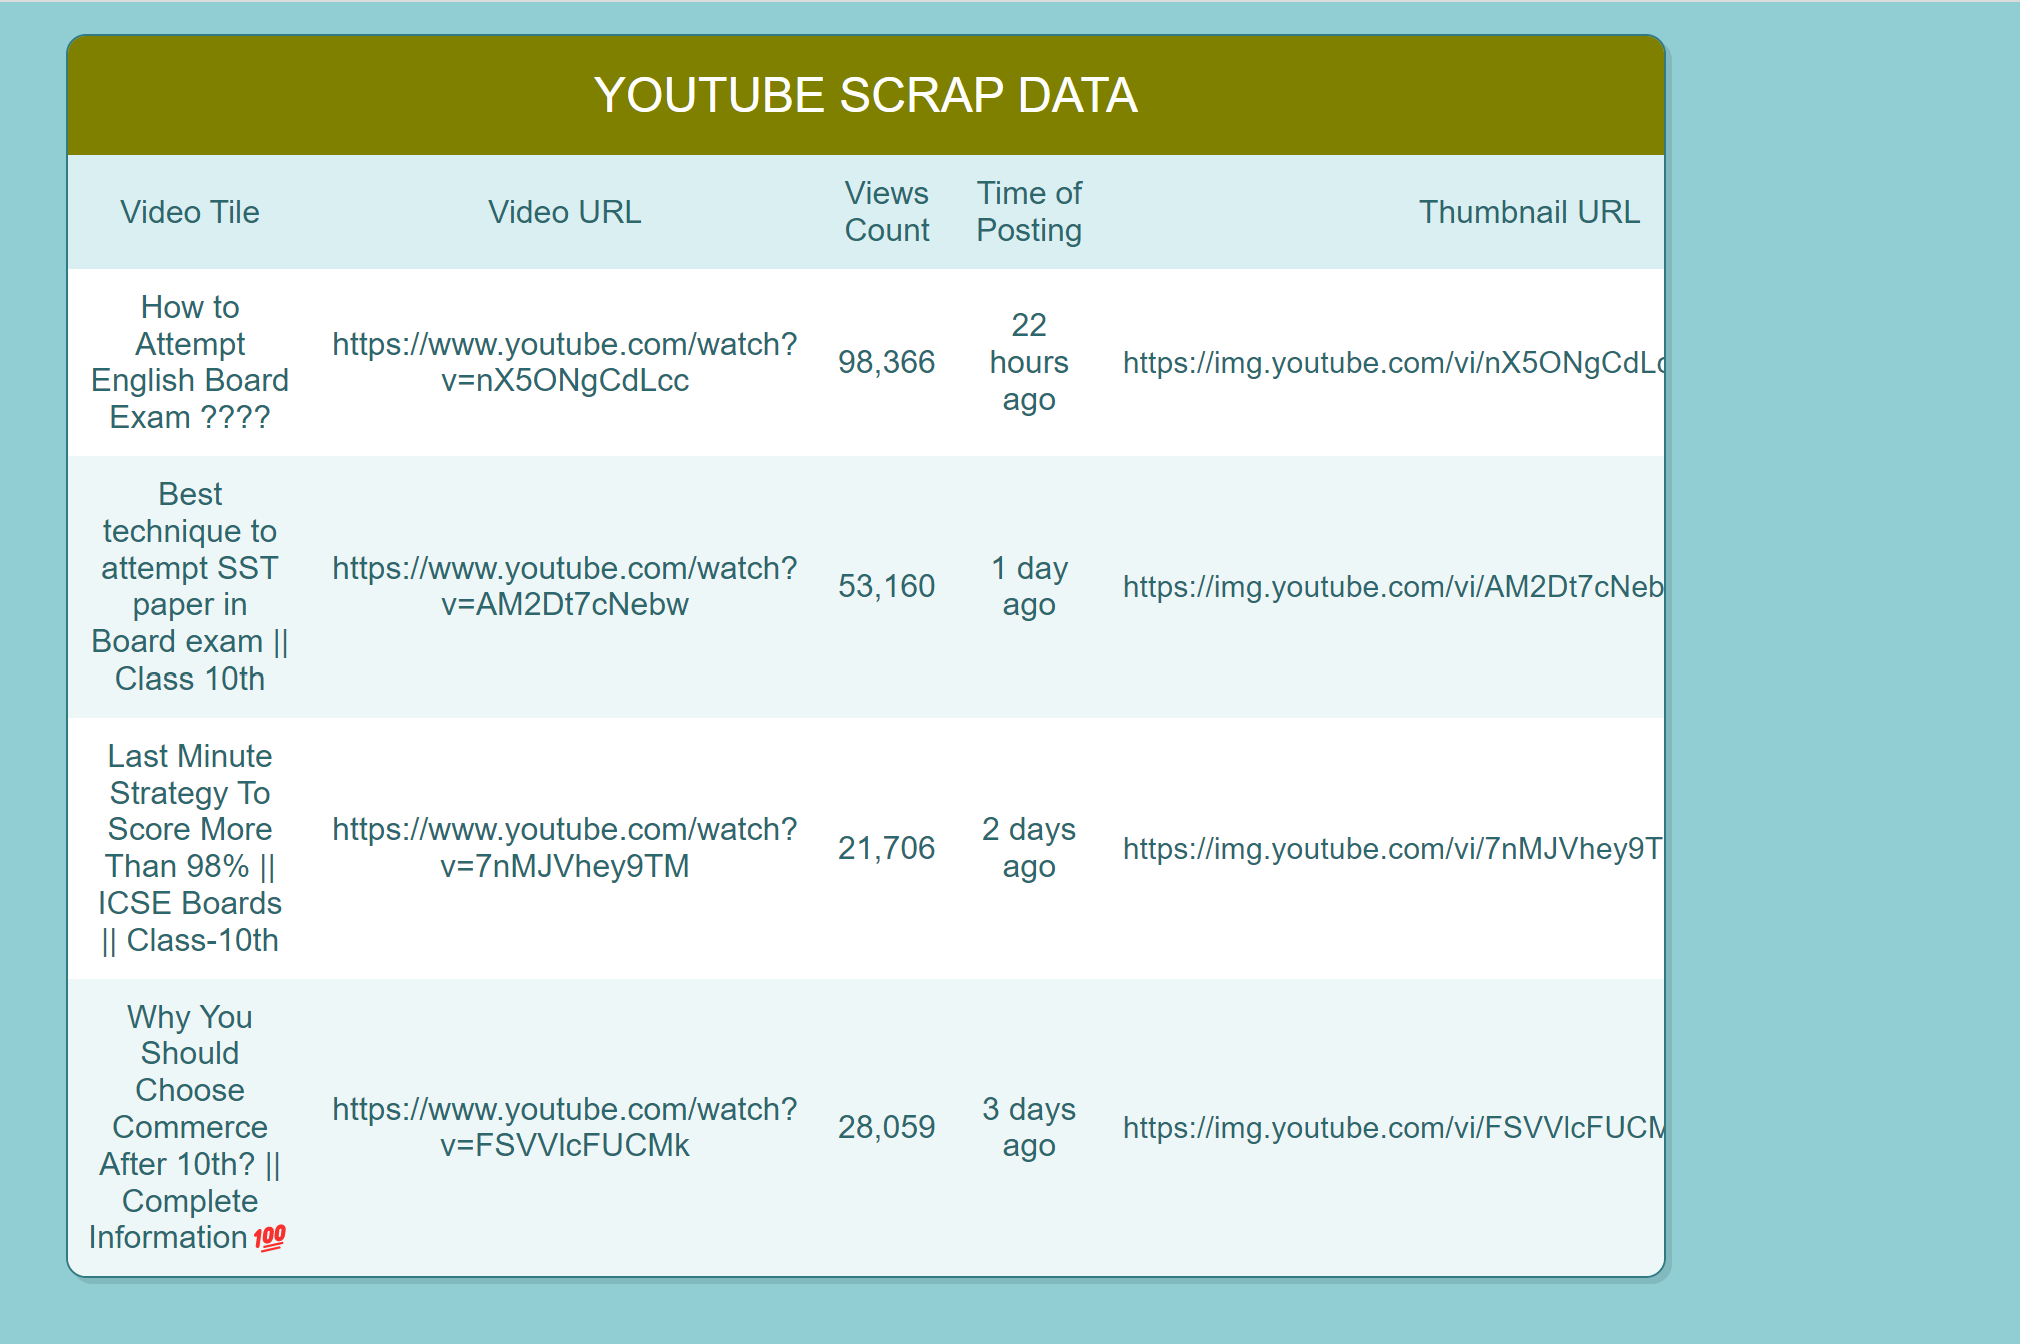

### The CSV Output

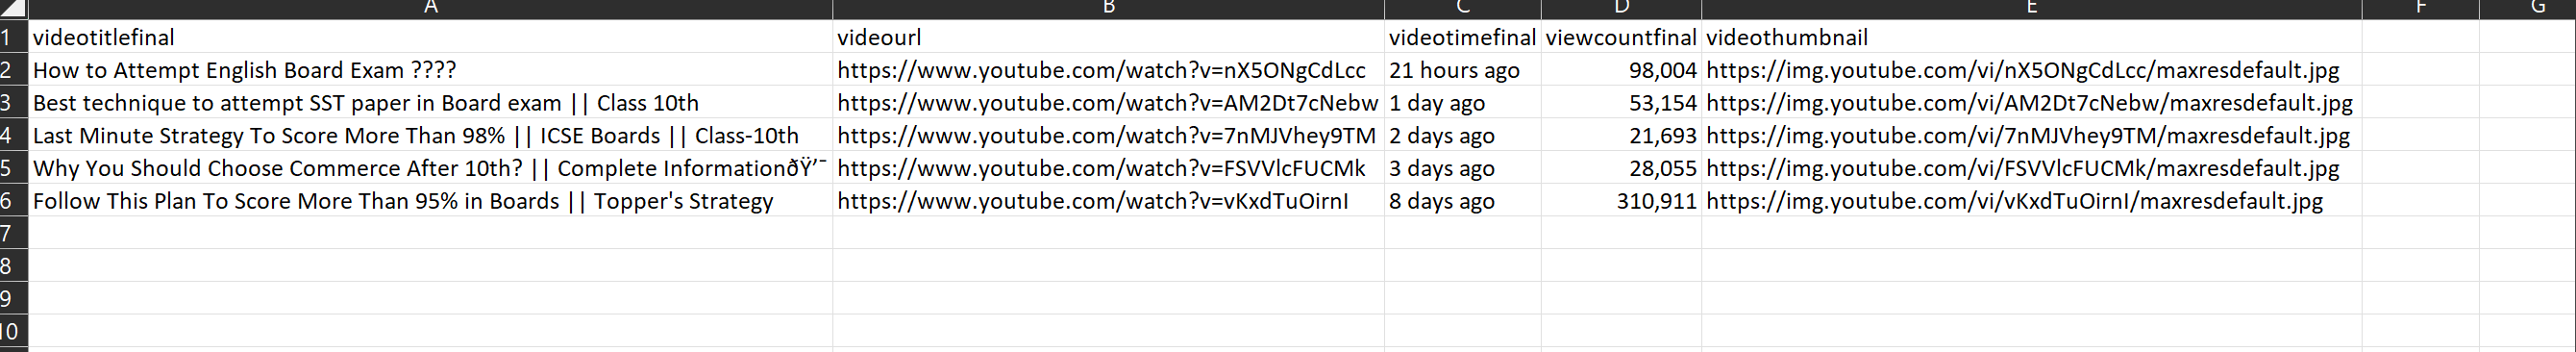

### The code committed to Github
https://github.com/abhimukh19/webscrapping

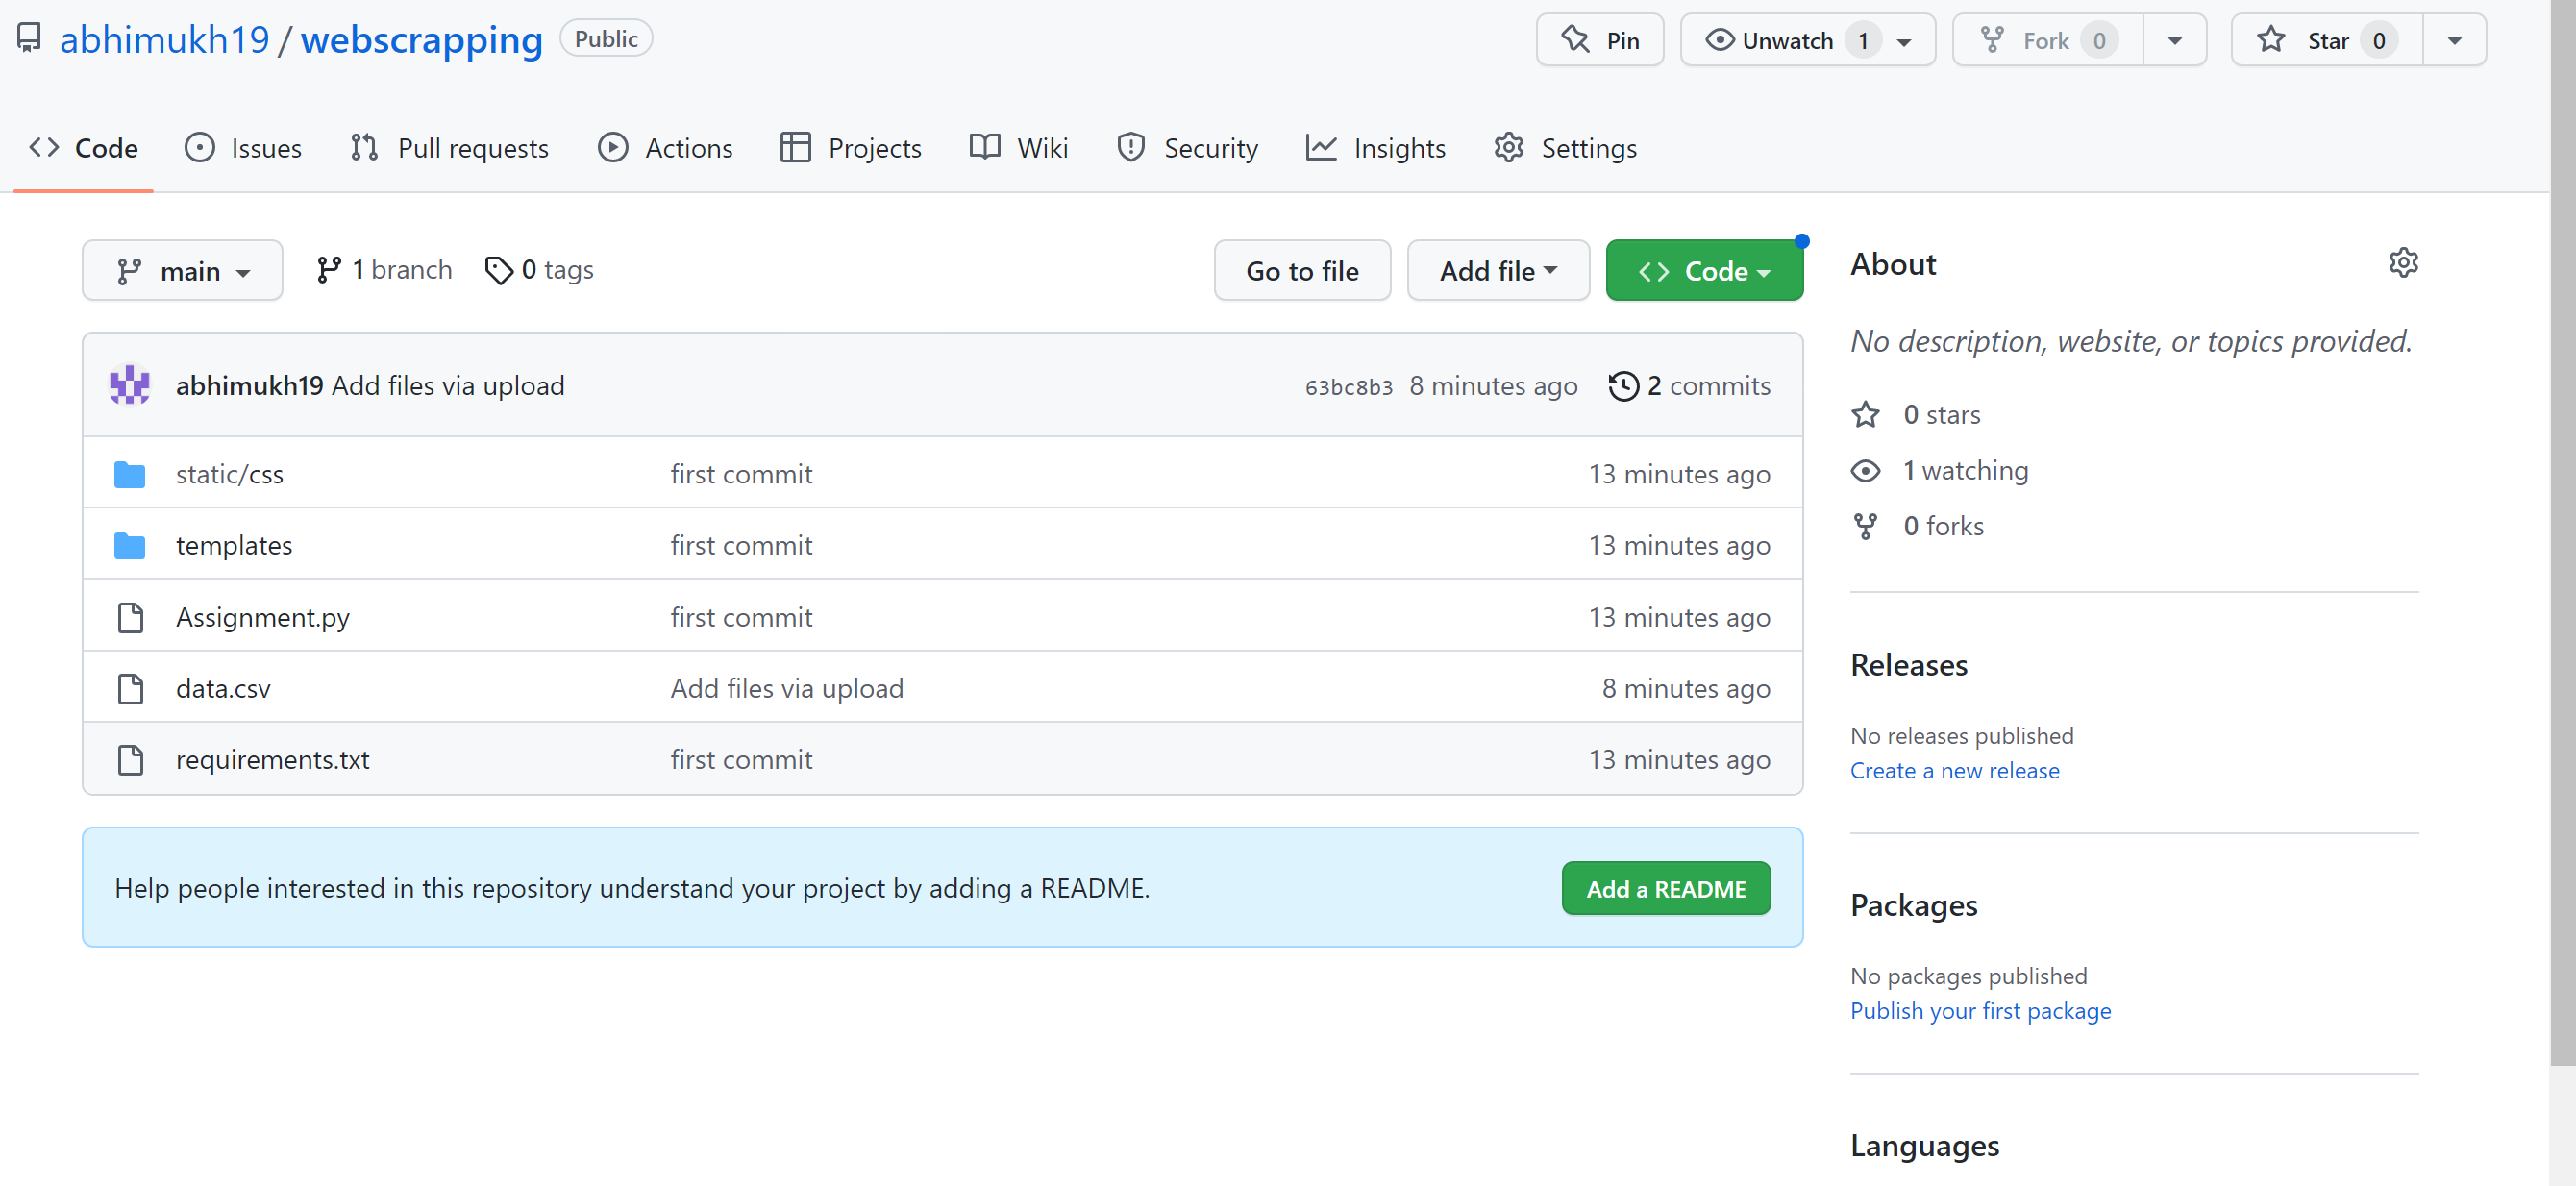

## Deployment on AWS



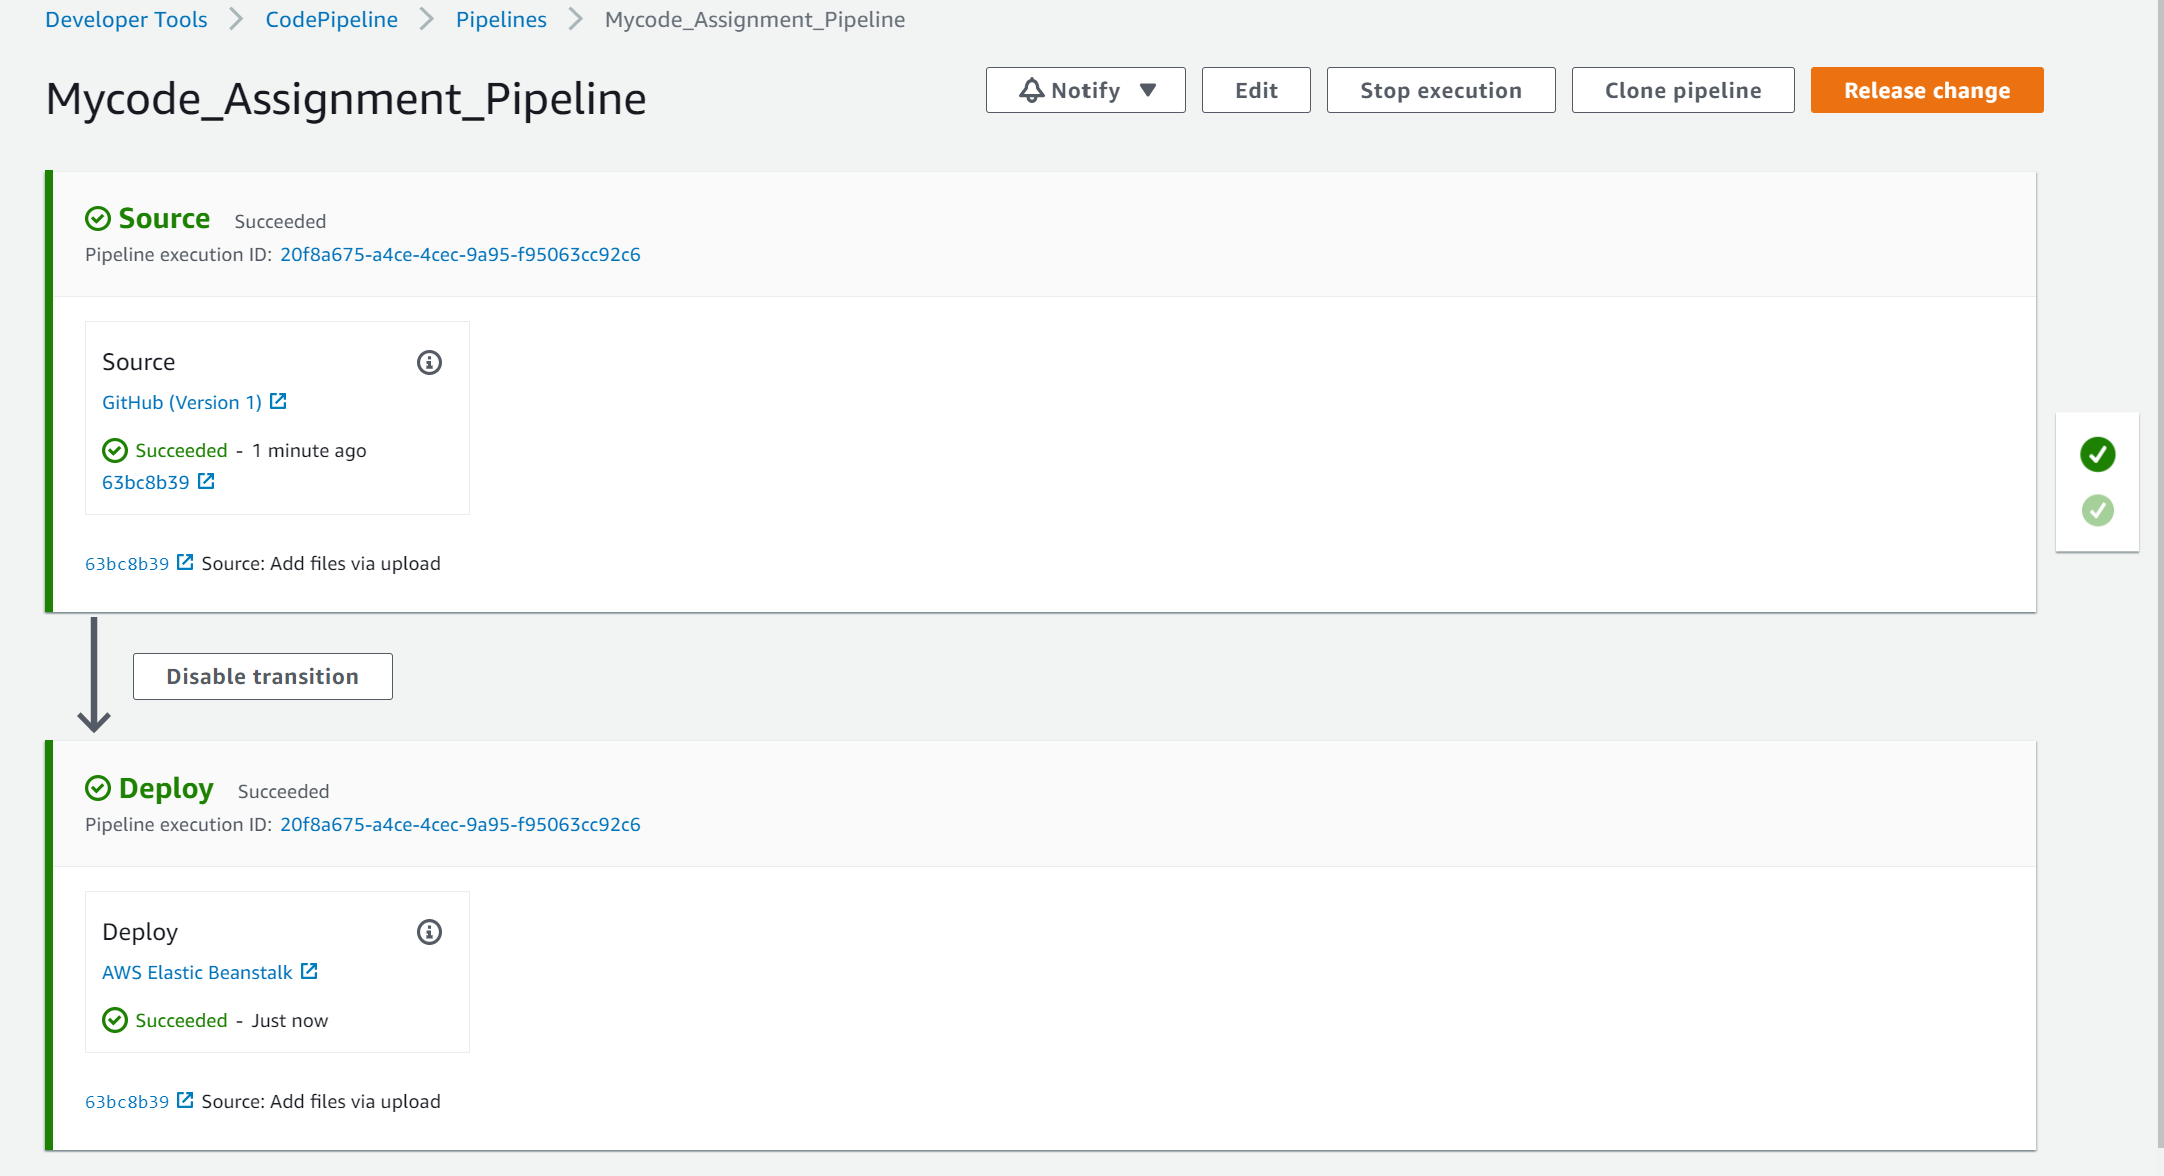